# Linear regression

## References
1. [Andrew NG's Machine learning course](https://www.coursera.org/learn/machine-learning)
2. [Gradient descent derivation](http://mccormickml.com/2014/03/04/gradient-descent-derivation/)
3. [Mathematics of Gradient Descent - Intelligence and Learning](https://www.youtube.com/watch?v=jc2IthslyzM) (All the math worked out including the calculus bits worked out that the other videos seem to gloss over)

In [2]:
import math


def cost(labels, features, weights):
    num_samples = len(labels)  # Or features
    (w0, w1) = weights

    # Work out the distance between the model (the line)
    # and the all the (label, feature) points
    sum_costs = 0.0
    for i in range(0, num_samples):
        actual_y = labels[i]
        x = features[i]
        predicted_y = (w0 + w1 * x)
        sum_costs += (actual_y - predicted_y)**2

    return 0.5 * (sum_costs/num_samples)


def cost_ddx(labels, features, weights, xexp):
    """
    Differential of the cost function. This takes an extra argument xexp,
    that is used to select whether we're differentiating wrt w0 or w1.
    xexp = 0 means wrt w0
    xexp = 1 means wrt w1
    """
    num_samples = len(labels)  # Or features
    (w0, w1) = weights

    # Work out the distance between the model (the line)
    # and the all the (label, feature) points
    sum_costs = 0.0
    for i in range(0, num_samples):
        actual_y = labels[i]
        x = features[i]
        predicted_y = (w0 + w1 * x)
        sum_costs += (predicted_y-actual_y)*(x**xexp)

    return 0.5 * (sum_costs/num_samples)


def train(labels, features, learning_rate=0.001, batches=1, weights=(0, 1)):
    "Attempts to minimise cost(weights)"

    (w0, w1) = weights

    for _ in range(0, batches):
        new_w0 = w0 - learning_rate * cost_ddx(labels, features, (w0, w1), 0)
        new_w1 = w1 - learning_rate * cost_ddx(labels, features, (w0, w1), 1)
        (w0, w1) = (new_w0, new_w1)

    # Evaluation
    ecost = cost(labels, features, (w0, w1))
    print(f'cost={ecost}, weights={(w0,w1)}')

    return (w0, w1)

### Generate some random data and train on it

In [3]:
import random

def model(weights):
    "A line"
    (w0, w1) = weights
    def predict(x):
        return w0 + w1*x
    return predict

def make_random_data():
    limit = 200
    ymax = 100
    scatter = 1000
    randw0 = random.randint(0,ymax)
    randw1 = random.uniform(-ymax,ymax)
    print("random data params", randw0, randw1)
    predict = model((randw0, randw1))
    
    ## Linear
    labels = [ random.uniform(predict(i)-scatter, predict(i)+scatter) for i in range(1,limit)]
    
    ## Square
    # labels = [ random.uniform(predict(i)**2-scatter, predict(i)**2+scatter) for i in range(1,limit)]

    ## Cubic
    # labels = [ random.uniform(predict(i)**3-scatter, predict(i)**3+scatter) for i in range(1,limit)]

    feats  = range(1,limit)
    return (labels, feats)

(labels, feats) = make_random_data()
weights = train(labels, feats, learning_rate=0.0001, batches=1000, weights=(0,0))

random data params 96 44.30924166636714
cost=178033.18481710344, weights=(1.2721096315406522, 45.20972965168394)


### Plot training data & prediction

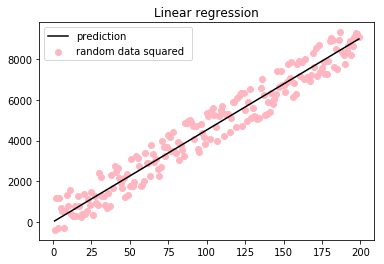

In [5]:
import matplotlib.pyplot as plt
from IPython import display

# Splatter plot the inputs
plt.scatter(feats, labels, color='lightpink', label='random data squared ')

# Draw a line from the first feature prediction to the last feature prediction
predict = model(weights)
plt.title('Linear regression', color='black')
plt.plot([min(feats), max(feats)], [predict(min(feats)), predict(max(feats))], color='black', label='prediction')
plt.legend()